# Final Project Regression, using OLS model
We will use this code in Power BI to create a regression and visualization

In [4]:
import pandas as pd
orig_data = pd.read_csv("pg_county_accidents.csv")
#data includes the year column with empty accident values which will be predicted

In [5]:
orig_data

,number_of_accidents,year,pred_year
0,15146.0,2015,2015
1,16858.0,2016,2016
2,17944.0,2017,2017
3,19194.0,2018,2018
4,20096.0,2019,2019
5,NaN,2020,2020
6,NaN,2021,2021
7,NaN,2022,2022
8,NaN,2023,2023
9,NaN,2024,2024


In [8]:
import statsmodels.formula.api as smf

#from the https://greenteapress.com/thinkstats2/thinkstats2.pdf
#Use Ordinary least Squares model from stats models
#create a regression between number of accidents and year using patsy syntax
#dependent variable on the left from the explanatory variables on the right.
#The fit method fits the model to the data and returns a RegressionResults
# object that contains the results.
model = smf.ols(formula = "number_of_accidents ~ year", data = orig_data)
reg_model = model.fit()

In [9]:
intercept = reg_model.params['Intercept']
intercept

-2450153.5999995884

In [10]:
slope = reg_model.params['year']
slope

1223.5999999997957

In [11]:
#reg_model.pvalues['number_of_accidents']

In [12]:
reg_model.rsquared

0.9879006601185035

In [13]:
#reg_model.summary()

In [14]:
#reg_model.params

In [17]:
pred=[]

#find predicted accidents for years 2020..2030 and add to the list
for y in orig_data.pred_year:
    inputs = {"year":[y]}
    pred.append (reg_model.predict(inputs)[0])

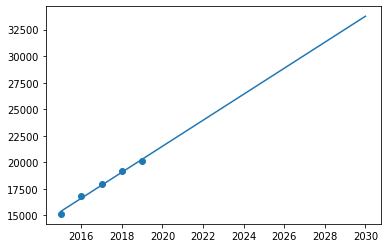

In [20]:
import matplotlib.pyplot as plt
#Plot actual data as scatter plot and add the regressed (predicted) line
plt.scatter(orig_data.year,orig_data.number_of_accidents)
plt.plot(orig_data.pred_year,pred)